#Introduction to Deep Learning with CNN

## Deep Learning Basics


This tutorial accompanies the [lecture on Deep Learning Basics](https://www.youtube.com/watch?list=PLrAXtmErZgOeiKm4sgNOknGvNjby9efdf&v=O5xeyoRL95U) given as part of [MIT Deep Learning](https://deeplearning.mit.edu). Acknowledgement to amazing people involved is provided throughout the tutorial and at the end. You can watch the video on YouTube:

[![Deep Learning Basics](https://i.imgur.com/FfQVV8q.png)](https://www.youtube.com/watch?list=PLrAXtmErZgOeiKm4sgNOknGvNjby9efdf&v=O5xeyoRL95U)


### Tutorial 2:

[How Neural Networks Work](https://youtu.be/JrXazCEACVo)

![Deep Learning in one slide](https://drive.google.com/uc?id=1Ssbp7zloWdPcKNgr9sYdzT0p7UfylsQ4)

---
![TensorFlow in one slide](https://drive.google.com/uc?id=1ZFYBqyOeQmlBib49lCBmw1tM5a0DD6t3)

---
![Deep Learning in AI](https://drive.google.com/uc?id=1xuUvFMya0o72bsLcElx0VkyIDkGY-WKr)

---
![Deep Learning vs ML](https://drive.google.com/uc?id=1nFLxNhbS9RAliMe86WEwxfkgZOp8gwhv)

---
![Deep Learning Training and testing](https://drive.google.com/uc?id=1M8KR2nh-_mmJcITmeJopitJtYSGqV3YF)

---
![Deep Learning back propergation](https://drive.google.com/uc?id=1afvifb4m43jRTLkD0577KlVICGmQAEai)


## Key Concepts

### Neuron:

![Neuron](https://drive.google.com/uc?id=1Za8fz9VA1AxodOXH6uMkpderlS_lWPrc)

---

![Forward Pass](https://drive.google.com/uc?id=142F88p81wra_FRVXZhqLEQ_1x9JeNHbC)

### Layers:

![Layers](https://drive.google.com/uc?id=1DsH-mI-RHqsWiTbopadre41Y7y6AJFlz)

### Activation Functions:

![Activation Functions](https://drive.google.com/uc?id=1N5qU19bgLzYbq-gCiCe3_py0F7H4vfz9)

### Loss Function:

![Loss Function](https://drive.google.com/uc?id=12uVNB1HreVn9xvPDA5GbAVfcFZRj8xG0)

### Backpropagation:

![Backpropagation](https://drive.google.com/uc?id=1TljMZv9crjewlmoADd4XA0UF7jCkQoGY)

[Tensorflow Playground](http://playground.tensorflow.org)

## Prerequisites:



[tf.keras](https://www.tensorflow.org/guide/keras) is the simplest way to build and train neural network models in TensorFlow. So, that's what we'll stick with in this tutorial, unless the models neccessitate a lower-level API.

Note that there's [tf.keras](https://www.tensorflow.org/guide/keras) (comes with TensorFlow) and there's [Keras](https://keras.io/) (standalone). You should be using [tf.keras](https://www.tensorflow.org/guide/keras) because (1) it comes with TensorFlow so you don't need to install anything extra and (2) it comes with powerful TensorFlow-specific features.

In [9]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Commonly used modules
import numpy as np
import os
import sys

# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
import IPython
from six.moves import urllib

print(tf.__version__)

2.14.0


## Convolutional Neural Networks

A Convolutional Neural Network (ConvNet/CNN) is a Deep Learning algorithm which can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image and be able to differentiate one from the other.

The role of the ConvNet is to reduce the images into a form which is easier to process, without losing features which are critical for getting a good prediction.

![Cnn](https://drive.google.com/uc?id=1q6JG3ycs1nbNV1f16mQcixOMpeZZEaUS)


### Convolution Layer — The Kernel

![Conv layer](https://drive.google.com/uc?id=1oG2idqaaiDGKWAIIEgTVvCfCh475sI1l)

In the above demonstration, the green section resembles our 5x5x1 input image, I. The element involved in carrying out the convolution operation in the first part of a Convolutional Layer is called the Kernel/Filter, K, represented in the color yellow. We have selected K as a 3x3x1 matrix.


![Conv layer 2](https://drive.google.com/uc?id=1sVLzJbt7UAM63UaCNFDirJRNTsy5A22O)

The objective of the Convolution Operation is to extract the high-level features such as edges, from the input image. ConvNets need not be limited to only one Convolutional Layer. Conventionally, the first ConvLayer is responsible for capturing the Low-Level features such as edges, color, gradient orientation, etc. With added layers, the architecture adapts to the High-Level features as well, giving us a network which has the wholesome understanding of images in the dataset, similar to how we would.

### Pooling Layer

![pooling layer](https://drive.google.com/uc?id=1s9zR9EsYomzEpnar6LOip-p8hs5y2K_Y)

Similar to the Convolutional Layer, the Pooling layer is responsible for reducing the spatial size of the Convolved Feature. This is to decrease the computational power required to process the data through dimensionality reduction. Furthermore, it is useful for extracting dominant features which are rotational and positional invariant, thus maintaining the process of effectively training of the model.

![pooling layer 2](https://drive.google.com/uc?id=14_gfkXgiqjGreq1rzLj0AWCcrP7VjwrS)

There are two types of Pooling: Max Pooling and Average Pooling. Max Pooling returns the maximum value from the portion of the image covered by the Kernel. On the other hand, Average Pooling returns the average of all the values from the portion of the image covered by the Kernel.

## Classification of MNIST Dreams with Convolutional Neural Networks

Next, let's build a convolutional neural network (CNN) classifier to classify images of handwritten digits in the MNIST dataset with a twist where we test our classifier on high-resolution hand-written digits from outside the dataset.

In [ ]:
# Set common constants
#this_repo_url = 'https://github.com/lexfridman/mit-deep-learning/raw/master/'
#this_tutorial_url = this_repo_url + 'tutorial_deep_learning_basics'

The MNIST dataset containss 70,000 grayscale images of handwritten digits at a resolution of 28 by 28 pixels. The task is to take one of these images as input and predict the most likely digit contained in the image (along with a relative confidence in this prediction):

<img src="https://i.imgur.com/ITrm9x4.png" width="500px">

Now, we load the dataset. The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The *labels* are an array of integers, ranging from 0 to 9.

In [10]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

# reshape images to specify that it's a single channel
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

We scale these values to a range of 0 to 1 before feeding to the neural network model. For this, we divide the values by 255. It's important that the *training set* and the *testing set* are preprocessed in the same way:

In [11]:
def preprocess_images(imgs): # should work for both a single image and multiple images
    sample_img = imgs if len(imgs.shape) == 2 else imgs[0]
    assert sample_img.shape in [(28, 28, 1), (28, 28)], sample_img.shape # make sure images are 28x28 and single-channel (grayscale)
    return imgs / 255.0

train_images = preprocess_images(train_images)
test_images = preprocess_images(test_images)

Display the first 5 images from the *training set* and display the class name below each image. Verify that the data is in the correct format and we're ready to build and train the network.

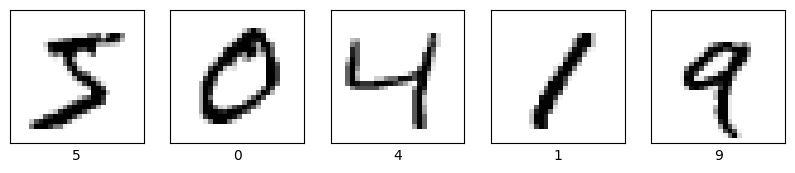

In [12]:
plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])

### Build the model

Building the neural network requires configuring the layers of the model, then compiling the model. In many cases, this can be reduced to simply stacking together layers:

In [13]:
model = keras.Sequential()
# 32 convolution filters used each of size 3x3
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
# 64 convolution filters used each of size 3x3
model.add(Conv2D(64, (3, 3), activation='relu'))
# choose the best features via pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
# randomly turn neurons on and off to improve convergence
model.add(Dropout(0.25))
# flatten since too many dimensions, we only want a classification output
model.add(Flatten())
# fully connected to get all relevant data
model.add(Dense(128, activation='relu'))
# one more dropout
model.add(Dropout(0.5))
# output a softmax to squash the matrix into output probabilities
model.add(Dense(10, activation='softmax'))

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:

* *Loss function* - measures how accurate the model is during training, we want to minimize this with the optimizer.
* *Optimizer* - how the model is updated based on the data it sees and its loss function.
* *Metrics* - used to monitor the training and testing steps. "accuracy" is the fraction of images that are correctly classified.

In [14]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model—in this example, the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. We ask the model to make predictions about a test set—in this example, the `test_images` array. We verify that the predictions match the labels from the `test_labels` array.

To start training,  call the `model.fit` method—the model is "fit" to the training data:

In [15]:
history = model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 165s 88ms/step - loss: 0.1874 - accuracy: 0.9428
Epoch 2/5
1875/1875 [==============================] - 158s 84ms/step - loss: 0.0778 - accuracy: 0.9765
Epoch 3/5
1875/1875 [==============================] - 158s 84ms/step - loss: 0.0599 - accuracy: 0.9819
Epoch 4/5
1875/1875 [==============================] - 157s 84ms/step - loss: 0.0485 - accuracy: 0.9849
Epoch 5/5
1875/1875 [==============================] - 159s 85ms/step - loss: 0.0400 - accuracy: 0.9873


As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 98.68% on the training data.

### Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [8]:
print(test_images.shape)
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

(10000, 28, 28, 1)
313/313 [==============================] - 14s 43ms/step - loss: 0.0346 - accuracy: 0.9895
Test accuracy: 0.9894999861717224


Often times, the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy is an example of *overfitting*. In our case, the accuracy is better at 99.19%! This is, in part, due to successful regularization accomplished with the Dropout layers.